
# Project: Investigate a Dataset - [The Movie Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, it consists of 21 columns each represent unique info about the movie as imdb_id, budget, revenue, genres & vote counts.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
1. What kinds of properties are associated with movies that have high revenues?

2.  What properties are associated with highly rated movies?

3. Which Genre Has The Highest Release Of Movies?



In [1]:
# Use this cell to set up import statements for all of the packages that youWhich genres are
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section, I load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()
#   types and look for instances of missing or possibly errant data.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Explore the shape of the dataset
df.shape

(10866, 21)

In [5]:
# Explore the basic information for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#data has null values so we count total rows in each column which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
#counting the duplicates 
sum(df.duplicated())

1

In [9]:
# Drop the duplicated row and check if there are no duplicated rows after cleaning
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
# Drop the row with the NaN value and check if there are NaN values after dropping
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [11]:
# displaying 0-valued data shape across our dataset.
zero_data=df[(df.revenue == 0)|(df.budget == 0)|(df.runtime == 0)]
zero_data.shape

(705, 21)

In [12]:
# check the statistics again

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
# Show the basic information of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

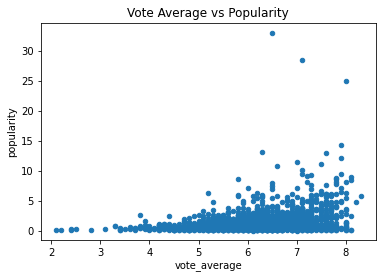

In [14]:
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Vote Average vs Popularity')
plt.show()

In [15]:
df.release_year.value_counts()

2011    219
2010    206
2009    192
2015    165
2014    153
2012    145
2008    142
2007    135
2013    128
2006     92
2005     72
2004     48
2003     40
2002     31
1999     24
2000     20
2001     19
1996     15
1998     13
1997     11
1995     10
1993     10
1994      8
1987      8
1981      6
1990      6
1983      6
1979      5
1984      5
1989      5
1992      5
1985      4
1988      4
1978      4
1971      4
1982      3
1991      3
1977      3
1975      3
1973      2
1964      2
1974      2
1986      2
1976      2
1980      2
1972      1
1970      1
1969      1
1967      1
1965      1
1963      1
1962      1
1961      1
Name: release_year, dtype: int64

## Seperate Data contained in Cast & Genres into Multiple values

In [16]:
def seprate_values(col):
    """Columns like cast & genres contain several values contained in a single cell separated by the "|"   so we need to separate these values to make a more appropriate analysis."""
    new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [17]:
df_gen = seprate_values('genres')

In [18]:
df_cast = seprate_values('cast')

In [19]:
df['cast'],df['genres']=df_cast['cast_1'],df_gen['genres_1']

In [20]:
display(df['cast'].value_counts().nlargest(10))
print('-'*60)
display(df['genres'].value_counts().nlargest(10))

Tom Hanks         14
Mark Wahlberg     14
Matt Damon        14
Nicolas Cage      13
Tom Cruise        12
Johnny Depp       12
George Clooney    11
Ben Affleck       10
Jeff Bridges      10
Christian Bale    10
Name: cast, dtype: int64

------------------------------------------------------------


Drama          435
Comedy         365
Action         304
Adventure      155
Horror         150
Thriller       102
Animation       84
Documentary     78
Crime           72
Fantasy         62
Name: genres, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


> In this section, I **Computed statistics** and **created visualizations** with the goal of addressing the research questions that I posed in the Introduction section. I computed the relevant statistics throughout the analysis when an inference is made about the data  



> I Investigated the stated question(s) from multiple angles with systematic approach. I first, looked at one variable at a time, and then follow it up by looking at relationships between variables. Also, I explored at least three variables in relation to the primary question. Lastly, I  performed both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: What kinds of properties are associated with movies that have high revenues?

There are two rows that can be used to understand the favorability of a movie, 'popularity' and 'vote_average'. I compare these columns with each other to identify which one will be more helpful in answering my question. 

In [21]:

#   # Discover the statistics of revenue
df.revenue.describe()


count    1.992000e+03
mean     1.152153e+08
std      2.202887e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.578782e+07
75%      1.278787e+08
max      2.781506e+09
Name: revenue, dtype: float64

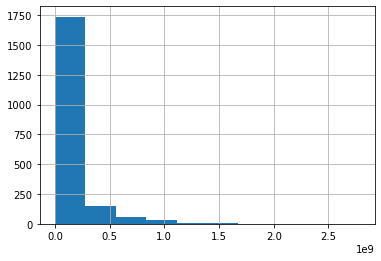

In [22]:
# Draw the histogram of the revenue
df.revenue.hist();

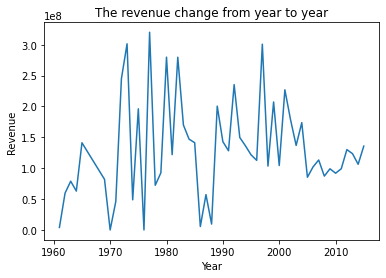

In [23]:
# Draw the line char for the change of the revenue
revenues = df.groupby('release_year')['revenue'].mean()

plt.plot(revenues)
plt.title('The revenue change from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

From the line chart above, the revenue changed drastically over the year, especially during the period of 1960s. However, the revenue shows an increasing trend from the overall perspective. Next, we need to compare the revenue in different years. Since there are too many years, we aggregate them into decades.

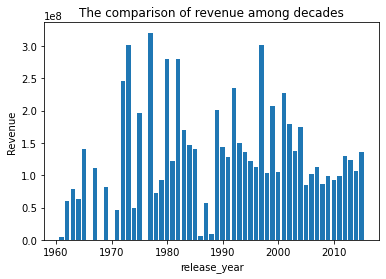

In [24]:
# Draw the bar chart to compare the revenue in differet decades
rev_dis = df.groupby('release_year').revenue.mean()

plt.bar(rev_dis.index, rev_dis.values)
plt.title('The comparison of revenue among decades')
plt.xlabel('release_year')
plt.ylabel('Revenue')

plt.show()

From the bar char above, the revenue increased over the year. The 2010s accounts for the most, while the 1960s accounts for the least.

Next, we need to find the pattern of the high revenue. To order to discover the pattern of the group of high revenues, it is defined that the high revenue is the revenue above the 75% percentile.

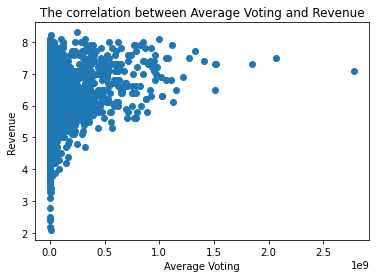

In [39]:
# Draw the scatterplot of the vote_average and revenue
#plt.scatter(x=df.revenues, y= df.vote_average)
plt.scatter(data = df, x = 'revenue', y = 'vote_average')
plt.title('The correlation between Average Voting and Revenue')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

In [40]:
# Calculate the correlation between 'vote_average' and 'revenue'
df[['vote_average', 'revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.258208
revenue,0.258208,1.000000


It shows that the correlation between 'vote_average' and 'revenue' is 0.258. The correlation is relatively low. The third group is 'budget' and 'revenue'.

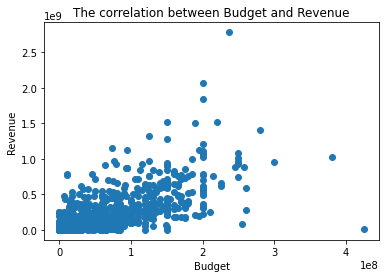

In [41]:
# Draw the scatterplot of the budget and revenue
plt.scatter(x=df.budget, y=df.revenue)
plt.title('The correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

In [42]:
# Calculate the correlation between 'vote_average' and 'revenue'
df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.747273
revenue,0.747273,1.000000


The correlation of 0.75 is relatively high for these two variables.

Overall, for the high revenue group, the revenue is related to the 'popularity' and 'budget', and less related to 'vote_average'.

 ### Research Question 2:  What properties are associated with highly rated movies?

There are two rows that can be used to understand the favorability of a movie, 'popularity' and 'vote_average'. I compare these columns with each other to identify which one will be more helpful in answering my question. 

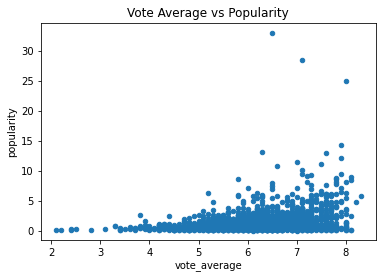

In [43]:
# Vote Average vs Popularity
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Vote Average vs Popularity')
plt.show()

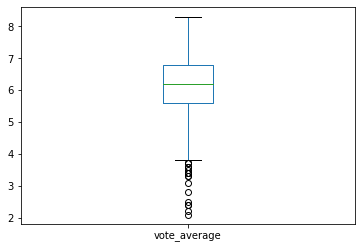

In [44]:
df['vote_average'].plot(kind='box')
plt.show()

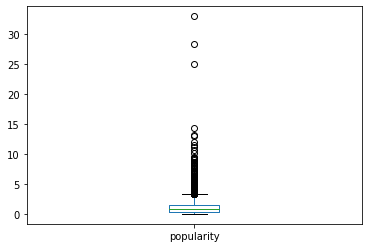

In [45]:
df['popularity'].plot(kind='box')
plt.show()

I want to first check to make sure that both 'popularity' and 'vote_average' represent the same thing. The scatter plot above illustrates that both columns are positively correlated. However, as shown by the box plots, 'vote_average' is more evenly distributed and lacks any outliers. Therefore, all following analysis will be done with 'vote_average'. 

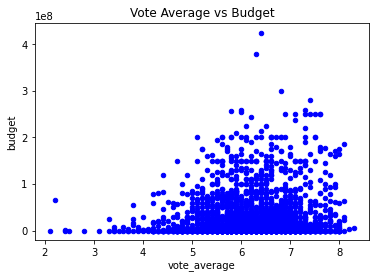

In [46]:
df.plot(x='vote_average',y='budget',kind='scatter', color = 'blue')
plt.title('Vote Average vs Budget')
plt.show()

This scatter plot illustrates a positive correlation, which means that movies with higher budgets tend be more highly voted by viewers. 

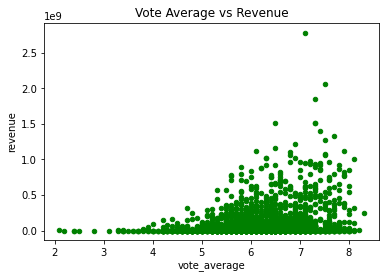

In [47]:
df.plot(x='vote_average',y='revenue',kind='scatter', color = 'green')
plt.title('Vote Average vs Revenue')
plt.show()

The above plot also indicates a positive correlation between revenue and vote average. This means that movies that are more highly rated by viewers tend to make more in revenue. 

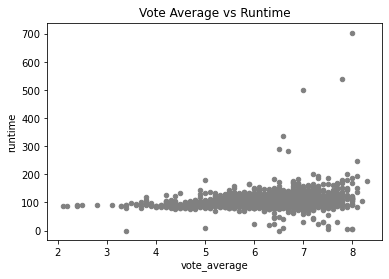

In [48]:
df.plot(x='vote_average',y='runtime',kind='scatter', color = 'gray')
plt.title('Vote Average vs Runtime')
plt.show()

This scatter plot suggests a weaker relationship between vote average and runtime. Though it appears that the longest movies have a higher vote average, there doesn't seem to be a decisive pattern between the two variables in general. 

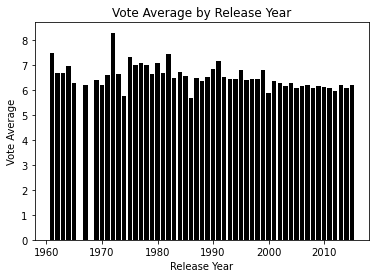

In [54]:
yearly_df = df.groupby('release_year').mean()
plt.bar(yearly_df.index,yearly_df['vote_average'], color = 'black')
plt.title('Vote Average by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

To create the above chart, I made a new dataframe that grouped the movies by release year. Then I plotted the vote average by release year on a bar chart. 

In this bar chart, there seems to be a slight downward slope in vote average over time. Though there isn't necessarily a clear trend, it is safe to say that the most highly voted movies on TMDb were released between 1960 and 1980. 

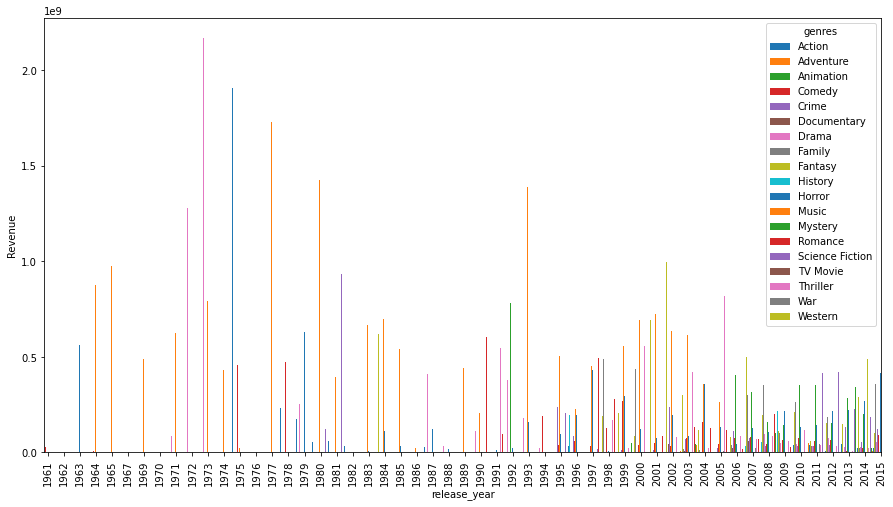

In [59]:
fig, ax = plt.subplots(figsize=(15,8))
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean).\
plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('Revenue');


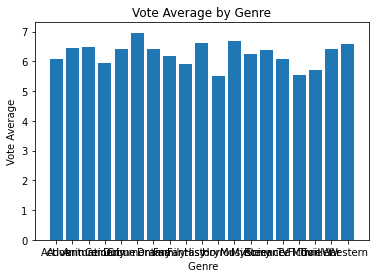

In [57]:
# Draw the bar chart to compare the revenue in differet decades
figsize=(12,5)

df_gen_gen = df.groupby('genres').vote_average.mean()

plt.bar(df_gen_gen.index, df_gen_gen.values)
plt.title('Vote Average by Genre')
plt.xlabel(' Genre')
plt.ylabel('Vote Average')

plt.show()



To compare vote averge by genre, I used the new table I made while cleaning the data (df_gen) to create another table that displays the mean value of all columns aggregated by genre type. Then I plotted the vote average mean on a bar chart for each genre. 

The chart shows that the lowest rated movies are horror, sci-fi, and TV movie, while the highest rated are documentary, history, and music. 

### Research Question 3:  Which Genre Has The Highest Release Of Movies?

In [62]:
total_genre_movies = df['genres'].value_counts()
print(total_genre_movies)

Drama              435
Comedy             365
Action             304
Adventure          155
Horror             150
Thriller           102
Animation           84
Documentary         78
Crime               72
Fantasy             62
Science Fiction     50
Romance             39
Family              34
Mystery             20
Music               13
History             10
War                 10
TV Movie             6
Western              3
Name: genres, dtype: int64


Text(0, 0.5, 'Genres')

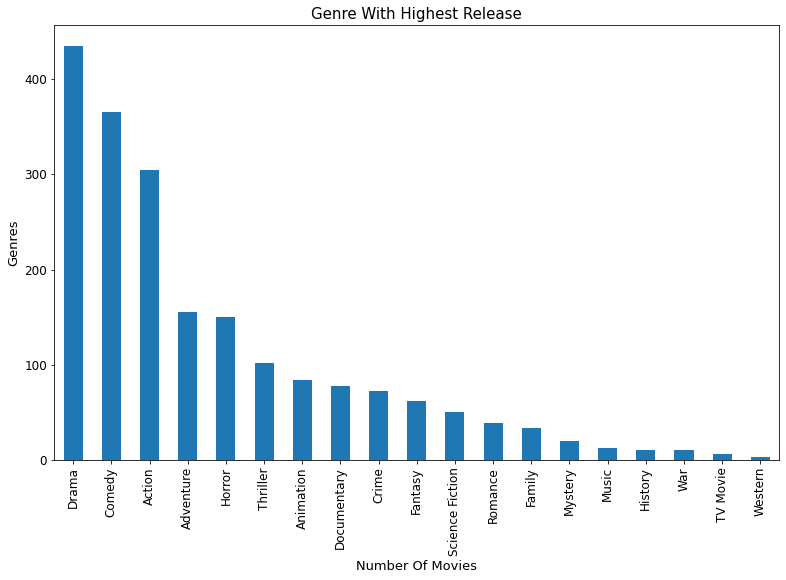

In [63]:
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,8),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

To the genre of each movie, I plotted the vote average mean on a bar chart for each genre. 

The chart shows that the lowest rated movies are horror, sci-fi, and TV movie, while the highest rated are documentary, history, and music. 

<a id='conclusions'></a>
## Conclusions


There are many qualities about movies that make them unique from one another. In this project, I was able to analyze these qualities and identify which properties are associated with movie popularity. 

After cleaning and trimming the dataset by removing unnecessary, null, and duplicated values, I created a secondary table that broke each movie down into the separate genres it falls under. 

Then I plotted a few charts to assess what will be used as the dependent variable, popularity or vote average. Because vote average was more evenly distributed, I used this as the variable that indicates favorability among viewers. 

Next, I plotted various other variables against vote average and found that movies with higher vote averages tend to have higher budgets and higher revenue. I also found that movies released between 1960-1980, documentaries, history movies, and music movies tend to be voted higher than others. 


## Limitations

Since my analysis only illustrates correlation between variables, it does not definitively conclude whether any trait can predict the vote average of a movie. That would require deeper statistical analysis that was not performed in this project. This is because correlation does not imply causation. To conduct a more extensive study, we would have to run statistical test such as T-test, chi-test, regression analysis.